1. Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. 
Сделать выводы о зависимости ошибки от этих параметров.


In [3]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [4]:
from sklearn.datasets import load_diabetes

In [5]:
X, y = load_diabetes(return_X_y=True)

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [7]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [8]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [9]:
def bias(y, z):
    return (y - z)

In [14]:
def gb_fit(n_trees, max_depth, X,  y, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X, y)
            
            train_errors.append(mean_squared_error(y, gb_predict(X, trees, coefs, eta)))
            
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X, bias(y, target))
            
            train_errors.append(mean_squared_error(y, gb_predict(X, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors

In [18]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 1

trees,errors = gb_fit(n_trees, max_depth, X_train,  y_train,  coefs, eta)

In [19]:
errors

[28655.59516616314,
 3044.129218420962,
 2760.7369317603543,
 2327.3704737330613,
 2042.4361209565432,
 1882.2997743266492,
 1605.9064991987445,
 1501.9615222312161,
 1392.9508054715725,
 1275.508602154247]

In [27]:
X_tree = []
X_depth = []
y_err = []
y_err2 = []



for tree in range(1, 100, 5):
    depth = 5
    trees, errors = gb_fit(tree, depth, X,  y, coefs, eta)
    prediction = gb_predict(X, trees, coefs, eta)
    err = mean_squared_error(y, prediction)
    X_tree.append(tree)
    y_err.append(err)
    
for depth in range(1, 100, 5):
    tree = 10
    trees, errors = gb_fit(tree, depth, X,  y, coefs, eta)
    prediction = gb_predict(X, trees, coefs, eta)
    err = mean_squared_error(y, prediction)
    X_depth.append(depth)
    y_err2.append(err)
       
      

In [28]:
import matplotlib.pyplot as plt

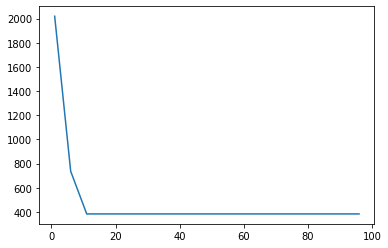

In [29]:
plt.plot(X_tree, y_err)


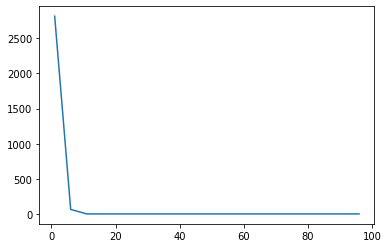

In [30]:
plt.plot(X_depth, y_err2)

In [ ]:
Количество деревьев и глубина имеют некоторый оптиму, больший объем применять неэффективно.